# Stock Price Prediction

## Data Preparation

In [ ]:
!pip install --upgrade pandas-datareader
!pip install yfinance
!pip install pytrends
!pip install --upgrade snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 3.0 MB/s eta 0:00:00


### Import Libraries

In [ ]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Load Dataset from Yahoo Finance using Pandas

In [ ]:
yf.pdr_override()
from pandas_datareader import data as pdr
df = pdr.DataReader('MSFT', '2015-01-01', '2023-02-11')
df.to_csv('drive/MyDrive/msft_stock_data.csv')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = pd.read_csv('drive/MyDrive/msft_stock_data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2042 non-null   object 
 1   Open       2042 non-null   float64
 2   High       2042 non-null   float64
 3   Low        2042 non-null   float64
 4   Close      2042 non-null   float64
 5   Adj Close  2042 non-null   float64
 6   Volume     2042 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 111.8+ KB
None


In [ ]:
df.shape

(2042, 7)

### Visualize Close Price History

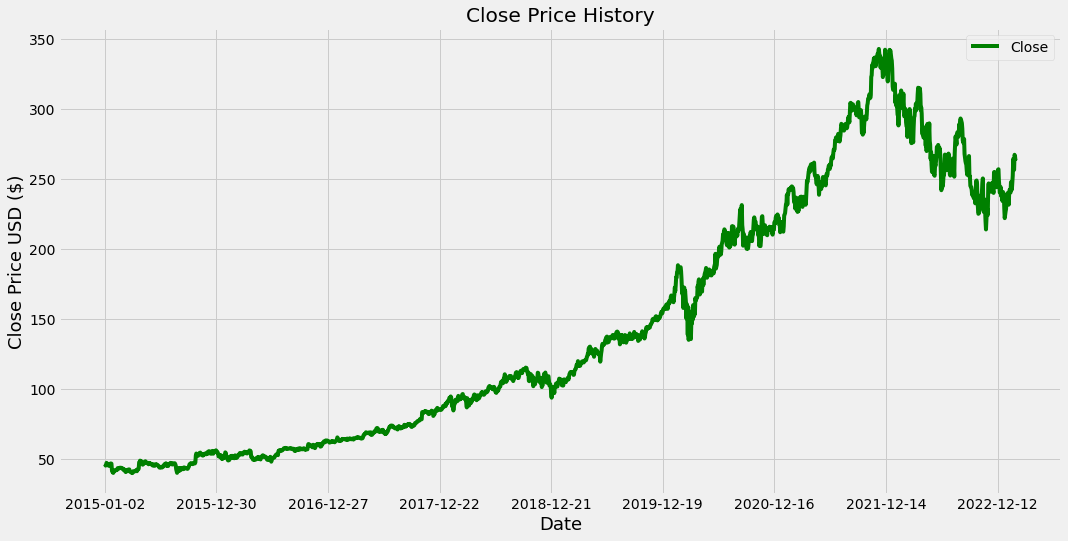

In [ ]:
#Visualize
plt.figure(figsize=(16,8))
ax = plt.gca()
plt.title('Close Price History')
df.plot(kind = 'line', x = 'Date', y = 'Close', color = 'green', ax = ax)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

### Create Function to Collect Google Trends and Twitter Data

In [ ]:
import datetime
from pytrends import dailydata
import snscrape.modules.twitter as sntwitter

def get_google_trends_data(keyword, from_date, to_date):

    #Gets daily Google Trends for keyword.
    #Dates Format: 'YYYY-MM-DD'

    from_year, from_month = datetime.date.fromisoformat(from_date).year, datetime.date.fromisoformat(from_date).month
    to_year, to_month = datetime.date.fromisoformat(to_date).year, datetime.date.fromisoformat(to_date).month

    data = dailydata.get_daily_data(keyword, from_year, from_month, to_year, to_month)

    return data[keyword]

def get_twitter_data(keyword, from_date, to_date):

    #Gets twitter posts containing specific keyword.
    #Dates Format: 'YYYY-MM-DD'

    # Creating list to append tweet data to
    counts_list = []
    dates_list = []

    days = pd.date_range(start = from_date, end = to_date)

    for i in range(len(days)-1):

        # Using TwitterSearchScraper to count daily tweets
        daily_count = 0
        for item in sntwitter.TwitterSearchScraper(keyword + ' since:' + str(days[i].date()) + ' until:' + str(days[i+1].date())).get_items():
            daily_count = daily_count + 1

        print("Day", str(days[i].date()), "had:", daily_count, ". Going to next day...")

        dates_list.append(days[i].date())
        counts_list.append(daily_count)

    return pd.DataFrame({'date': dates_list, 'tweets': counts_list})

### Collecting Google Trends Data

In [ ]:
# Get Google data and save them
google = get_google_trends_data('MSFT', '2015-01-01', '2023-02-11')


MSFT:2015-01-01 2015-01-31
MSFT:2015-02-01 2015-02-28
MSFT:2015-03-01 2015-03-31
MSFT:2015-04-01 2015-04-30
MSFT:2015-05-01 2015-05-31
MSFT:2015-06-01 2015-06-30
MSFT:2015-07-01 2015-07-31
MSFT:2015-08-01 2015-08-31
MSFT:2015-09-01 2015-09-30
MSFT:2015-10-01 2015-10-31
MSFT:2015-11-01 2015-11-30
MSFT:2015-12-01 2015-12-31
MSFT:2016-01-01 2016-01-31
MSFT:2016-02-01 2016-02-29
MSFT:2016-03-01 2016-03-31
MSFT:2016-04-01 2016-04-30
MSFT:2016-05-01 2016-05-31
MSFT:2016-06-01 2016-06-30
MSFT:2016-07-01 2016-07-31
MSFT:2016-08-01 2016-08-31
MSFT:2016-09-01 2016-09-30
MSFT:2016-10-01 2016-10-31
MSFT:2016-11-01 2016-11-30
MSFT:2016-12-01 2016-12-31
MSFT:2017-01-01 2017-01-31
MSFT:2017-02-01 2017-02-28
MSFT:2017-03-01 2017-03-31
MSFT:2017-04-01 2017-04-30
MSFT:2017-05-01 2017-05-31
MSFT:2017-06-01 2017-06-30
MSFT:2017-07-01 2017-07-31
MSFT:2017-08-01 2017-08-31
MSFT:2017-09-01 2017-09-30
MSFT:2017-10-01 2017-10-31
MSFT:2017-11-01 2017-11-30
MSFT:2017-12-01 2017-12-31
MSFT:2018-01-01 2018-01-31
M

In [ ]:
google.to_csv('drive/MyDrive/msft_google_data.csv')

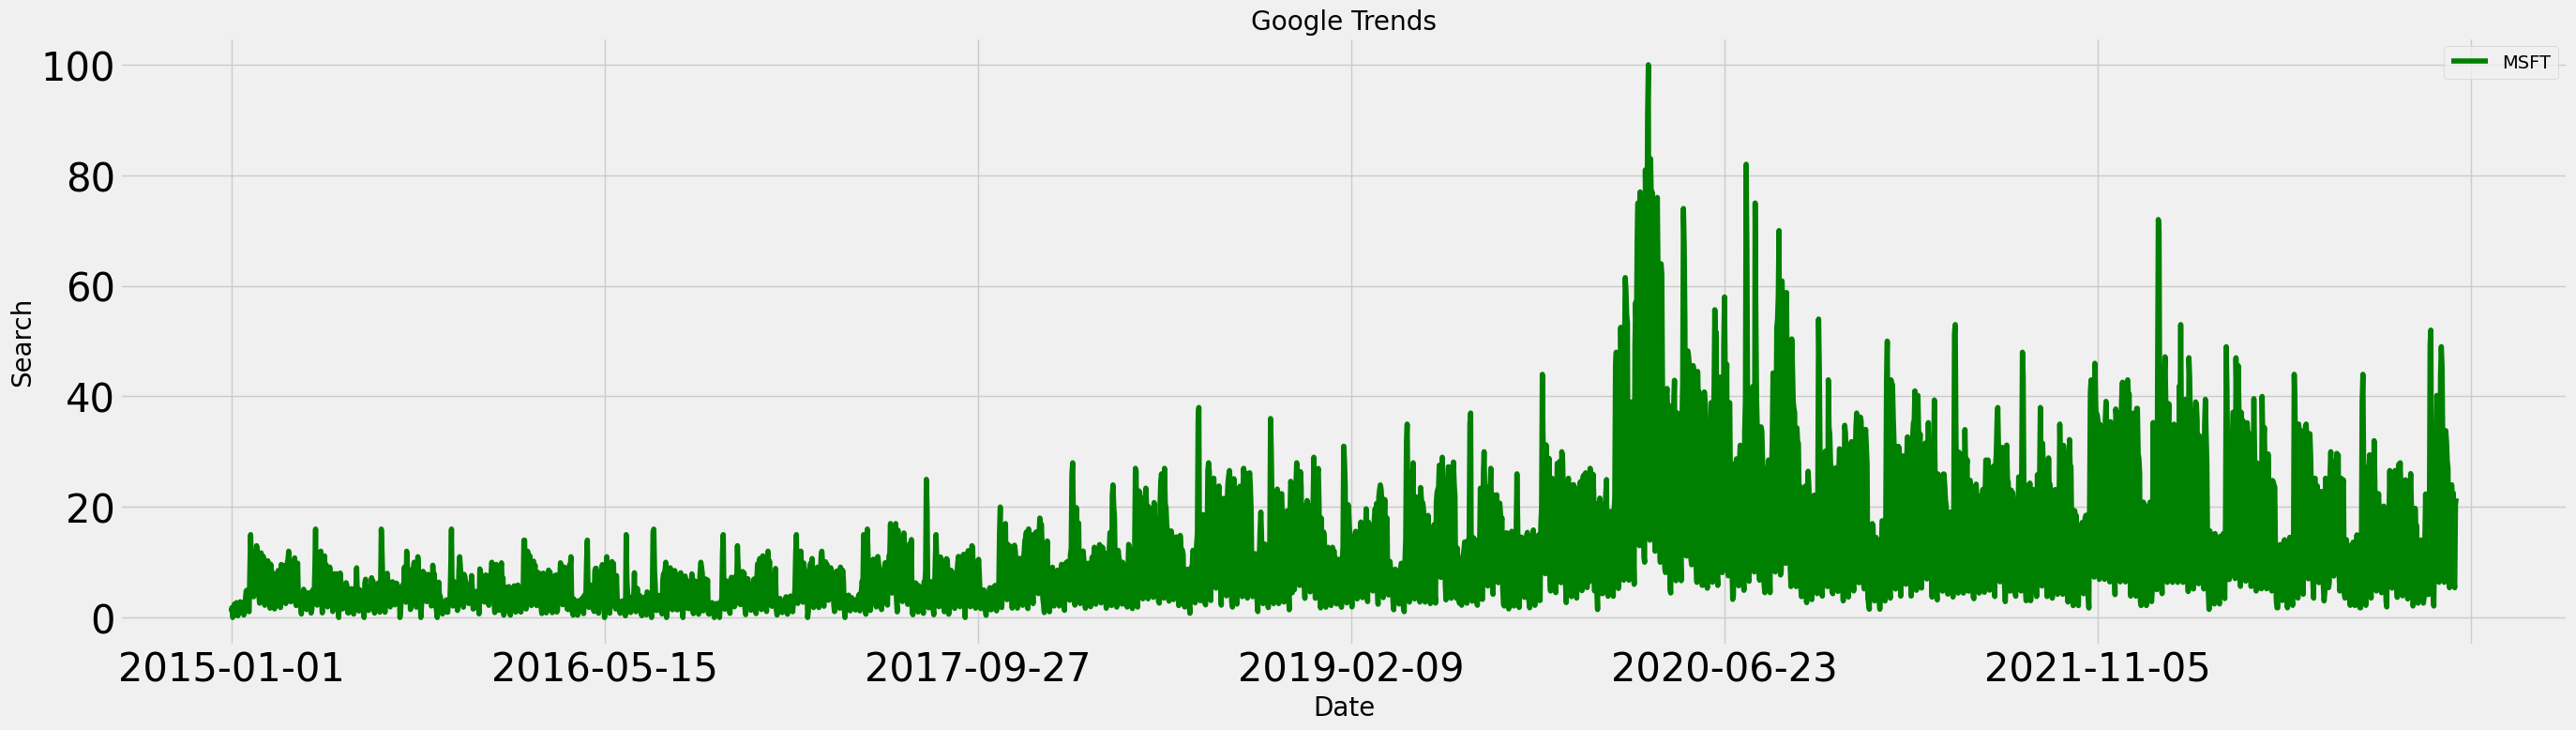

In [ ]:
dfg = pd.read_csv('drive/MyDrive/msft_google_data.csv')
#Visualize
plt.figure(figsize=(30,8))
ax = plt.gca()
plt.title('Google Trends')
dfg.plot(kind = 'line', x = 'date', y = 'MSFT', color = 'green', ax = ax)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Search', fontsize=20)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
plt.show()

### Collecting Twitter Data

In [ ]:
twitter = get_twitter_data('$MSFT', '2015-01-01', '2015-12-31')

Day 2015-01-01 had: 58 . Going to next day...
Day 2015-01-02 had: 117 . Going to next day...
Day 2015-01-03 had: 60 . Going to next day...
Day 2015-01-04 had: 43 . Going to next day...
Day 2015-01-05 had: 123 . Going to next day...
Day 2015-01-06 had: 82 . Going to next day...
Day 2015-01-07 had: 96 . Going to next day...
Day 2015-01-08 had: 107 . Going to next day...
Day 2015-01-09 had: 103 . Going to next day...
Day 2015-01-10 had: 39 . Going to next day...
Day 2015-01-11 had: 35 . Going to next day...
Day 2015-01-12 had: 83 . Going to next day...
Day 2015-01-13 had: 130 . Going to next day...
Day 2015-01-14 had: 121 . Going to next day...
Day 2015-01-15 had: 117 . Going to next day...
Day 2015-01-16 had: 104 . Going to next day...
Day 2015-01-17 had: 51 . Going to next day...
Day 2015-01-18 had: 35 . Going to next day...
Day 2015-01-19 had: 90 . Going to next day...
Day 2015-01-20 had: 85 . Going to next day...
Day 2015-01-21 had: 356 . Going to next day...
Day 2015-01-22 had: 282 .

Day 2015-09-22 had: 188 . Going to next day...
Day 2015-09-23 had: 130 . Going to next day...
Day 2015-09-24 had: 135 . Going to next day...
Day 2015-09-25 had: 87 . Going to next day...
Day 2015-09-26 had: 31 . Going to next day...
Day 2015-09-27 had: 27 . Going to next day...
Day 2015-09-28 had: 117 . Going to next day...
Day 2015-09-29 had: 166 . Going to next day...
Day 2015-09-30 had: 277 . Going to next day...
Day 2015-10-01 had: 233 . Going to next day...
Day 2015-10-02 had: 189 . Going to next day...
Day 2015-10-03 had: 49 . Going to next day...
Day 2015-10-04 had: 44 . Going to next day...
Day 2015-10-05 had: 168 . Going to next day...
Day 2015-10-06 had: 367 . Going to next day...
Day 2015-10-07 had: 238 . Going to next day...
Day 2015-10-08 had: 187 . Going to next day...
Day 2015-10-09 had: 181 . Going to next day...
Day 2015-10-10 had: 61 . Going to next day...
Day 2015-10-11 had: 36 . Going to next day...
Day 2015-10-12 had: 296 . Going to next day...
Day 2015-10-13 had: 

Day 2015-10-16 had: 183 . Going to next day...
Day 2015-10-17 had: 87 . Going to next day...
Day 2015-10-18 had: 73 . Going to next day...
Day 2015-10-19 had: 191 . Going to next day...
Day 2015-10-20 had: 197 . Going to next day...
Day 2015-10-21 had: 185 . Going to next day...
Day 2015-10-22 had: 648 . Going to next day...
Day 2015-10-23 had: 794 . Going to next day...
Day 2015-10-24 had: 209 . Going to next day...
Day 2015-10-25 had: 185 . Going to next day...
Day 2015-10-26 had: 352 . Going to next day...
Day 2015-10-27 had: 317 . Going to next day...
Day 2015-10-28 had: 377 . Going to next day...
Day 2015-10-29 had: 345 . Going to next day...
Day 2015-10-30 had: 235 . Going to next day...
Day 2015-10-31 had: 94 . Going to next day...
Day 2015-11-01 had: 44 . Going to next day...
Day 2015-11-02 had: 129 . Going to next day...
Day 2015-11-03 had: 150 . Going to next day...
Day 2015-11-04 had: 268 . Going to next day...
Day 2015-11-05 had: 218 . Going to next day...
Day 2015-11-06 ha

Day 2015-11-18 had: 171 . Going to next day...
Day 2015-11-19 had: 180 . Going to next day...
Day 2015-11-20 had: 290 . Going to next day...
Day 2015-11-21 had: 40 . Going to next day...
Day 2015-11-22 had: 43 . Going to next day...
Day 2015-11-23 had: 123 . Going to next day...
Day 2015-11-24 had: 115 . Going to next day...
Day 2015-11-25 had: 190 . Going to next day...
Day 2015-11-26 had: 60 . Going to next day...
Day 2015-11-27 had: 98 . Going to next day...
Day 2015-11-28 had: 41 . Going to next day...
Day 2015-11-29 had: 40 . Going to next day...
Day 2015-11-30 had: 374 . Going to next day...
Day 2015-12-01 had: 269 . Going to next day...
Day 2015-12-02 had: 496 . Going to next day...
Day 2015-12-03 had: 164 . Going to next day...
Day 2015-12-04 had: 136 . Going to next day...
Day 2015-12-05 had: 55 . Going to next day...
Day 2015-12-06 had: 53 . Going to next day...
Day 2015-12-07 had: 133 . Going to next day...
Day 2015-12-08 had: 112 . Going to next day...
Day 2015-12-09 had: 1

In [ ]:
twitter.to_csv('drive/MyDrive/msft_twitter_data_1.csv')

In [ ]:
twitter = get_twitter_data('$MSFT', '2015-12-31', '2017-01-01')

Day 2015-12-31 had: 193 . Going to next day...
Day 2016-01-01 had: 41 . Going to next day...
Day 2016-01-02 had: 48 . Going to next day...
Day 2016-01-03 had: 86 . Going to next day...
Day 2016-01-04 had: 233 . Going to next day...


Day 2016-01-05 had: 137 . Going to next day...
Day 2016-01-06 had: 175 . Going to next day...
Day 2016-01-07 had: 147 . Going to next day...
Day 2016-01-08 had: 487 . Going to next day...
Day 2016-01-09 had: 103 . Going to next day...
Day 2016-01-10 had: 61 . Going to next day...
Day 2016-01-11 had: 124 . Going to next day...
Day 2016-01-12 had: 130 . Going to next day...
Day 2016-01-13 had: 317 . Going to next day...
Day 2016-01-14 had: 188 . Going to next day...
Day 2016-01-15 had: 295 . Going to next day...
Day 2016-01-16 had: 84 . Going to next day...
Day 2016-01-17 had: 97 . Going to next day...
Day 2016-01-18 had: 117 . Going to next day...
Day 2016-01-19 had: 219 . Going to next day...
Day 2016-01-20 had: 265 . Going to next day...
Day 2016-01-21 had: 136 . Going to next day...
Day 2016-01-22 had: 136 . Going to next day...
Day 2016-01-23 had: 71 . Going to next day...
Day 2016-01-24 had: 139 . Going to next day...
Day 2016-01-25 had: 183 . Going to next day...
Day 2016-01-26 ha

In [ ]:
twitter.to_csv('drive/MyDrive/msft_twitter_data_2.csv')

In [ ]:
twitter = get_twitter_data('$MSFT', '2017-01-01', '2018-01-01')

Day 2017-01-01 had: 115 . Going to next day...
Day 2017-01-02 had: 141 . Going to next day...
Day 2017-01-03 had: 196 . Going to next day...
Day 2017-01-04 had: 222 . Going to next day...
Day 2017-01-05 had: 235 . Going to next day...
Day 2017-01-06 had: 282 . Going to next day...
Day 2017-01-07 had: 153 . Going to next day...
Day 2017-01-08 had: 124 . Going to next day...
Day 2017-01-09 had: 266 . Going to next day...
Day 2017-01-10 had: 308 . Going to next day...
Day 2017-01-11 had: 330 . Going to next day...
Day 2017-01-12 had: 321 . Going to next day...
Day 2017-01-13 had: 268 . Going to next day...
Day 2017-01-14 had: 135 . Going to next day...
Day 2017-01-15 had: 156 . Going to next day...
Day 2017-01-16 had: 226 . Going to next day...
Day 2017-01-17 had: 383 . Going to next day...
Day 2017-01-18 had: 307 . Going to next day...
Day 2017-01-19 had: 261 . Going to next day...
Day 2017-01-20 had: 226 . Going to next day...
Day 2017-01-21 had: 167 . Going to next day...
Day 2017-01-2

In [ ]:
twitter.to_csv('drive/MyDrive/msft_twitter_data_3.csv')

In [ ]:
twitter = get_twitter_data('$MSFT', '2018-01-01', '2019-01-01')

Day 2018-01-01 had: 72 . Going to next day...
Day 2018-01-02 had: 164 . Going to next day...
Day 2018-01-03 had: 154 . Going to next day...
Day 2018-01-04 had: 176 . Going to next day...
Day 2018-01-05 had: 183 . Going to next day...
Day 2018-01-06 had: 93 . Going to next day...
Day 2018-01-07 had: 77 . Going to next day...
Day 2018-01-08 had: 129 . Going to next day...
Day 2018-01-09 had: 202 . Going to next day...
Day 2018-01-10 had: 187 . Going to next day...
Day 2018-01-11 had: 127 . Going to next day...
Day 2018-01-12 had: 173 . Going to next day...
Day 2018-01-13 had: 100 . Going to next day...
Day 2018-01-14 had: 80 . Going to next day...
Day 2018-01-15 had: 111 . Going to next day...
Day 2018-01-16 had: 156 . Going to next day...
Day 2018-01-17 had: 166 . Going to next day...
Day 2018-01-18 had: 188 . Going to next day...
Day 2018-01-19 had: 157 . Going to next day...
Day 2018-01-20 had: 80 . Going to next day...
Day 2018-01-21 had: 94 . Going to next day...
Day 2018-01-22 had:

In [ ]:
twitter.to_csv('drive/MyDrive/msft_twitter_data_4.csv')

In [ ]:
twitter = get_twitter_data('$MSFT', '2019-01-01', '2020-01-01')

Day 2019-01-01 had: 75 . Going to next day...
Day 2019-01-02 had: 225 . Going to next day...
Day 2019-01-03 had: 235 . Going to next day...
Day 2019-01-04 had: 163 . Going to next day...
Day 2019-01-05 had: 60 . Going to next day...
Day 2019-01-06 had: 65 . Going to next day...
Day 2019-01-07 had: 219 . Going to next day...
Day 2019-01-08 had: 198 . Going to next day...
Day 2019-01-09 had: 169 . Going to next day...
Day 2019-01-10 had: 159 . Going to next day...
Day 2019-01-11 had: 157 . Going to next day...
Day 2019-01-12 had: 56 . Going to next day...
Day 2019-01-13 had: 55 . Going to next day...
Day 2019-01-14 had: 115 . Going to next day...
Day 2019-01-15 had: 261 . Going to next day...
Day 2019-01-16 had: 247 . Going to next day...
Day 2019-01-17 had: 243 . Going to next day...
Day 2019-01-18 had: 243 . Going to next day...
Day 2019-01-19 had: 135 . Going to next day...
Day 2019-01-20 had: 150 . Going to next day...
Day 2019-01-21 had: 162 . Going to next day...
Day 2019-01-22 had

In [ ]:
twitter.to_csv('drive/MyDrive/msft_twitter_data_5.csv')

In [ ]:
twitter = get_twitter_data('$MSFT', '2020-01-01', '2021-01-01')

Day 2020-01-01 had: 102 . Going to next day...
Day 2020-01-02 had: 321 . Going to next day...
Day 2020-01-03 had: 213 . Going to next day...
Day 2020-01-04 had: 84 . Going to next day...
Day 2020-01-05 had: 96 . Going to next day...
Day 2020-01-06 had: 211 . Going to next day...
Day 2020-01-07 had: 244 . Going to next day...
Day 2020-01-08 had: 303 . Going to next day...
Day 2020-01-09 had: 364 . Going to next day...
Day 2020-01-10 had: 291 . Going to next day...
Day 2020-01-11 had: 108 . Going to next day...
Day 2020-01-12 had: 76 . Going to next day...
Day 2020-01-13 had: 277 . Going to next day...
Day 2020-01-14 had: 303 . Going to next day...
Day 2020-01-15 had: 248 . Going to next day...
Day 2020-01-16 had: 407 . Going to next day...
Day 2020-01-17 had: 484 . Going to next day...
Day 2020-01-18 had: 128 . Going to next day...
Day 2020-01-19 had: 81 . Going to next day...
Day 2020-01-20 had: 137 . Going to next day...
Day 2020-01-21 had: 276 . Going to next day...
Day 2020-01-22 ha

In [ ]:
twitter.to_csv('drive/MyDrive/msft_twitter_data_6.csv')

In [ ]:
twitter = get_twitter_data('$MSFT', '2021-01-01', '2022-01-01')

Day 2021-01-01 had: 199 . Going to next day...
Day 2021-01-02 had: 192 . Going to next day...
Day 2021-01-03 had: 201 . Going to next day...
Day 2021-01-04 had: 419 . Going to next day...
Day 2021-01-05 had: 349 . Going to next day...
Day 2021-01-06 had: 543 . Going to next day...
Day 2021-01-07 had: 399 . Going to next day...
Day 2021-01-08 had: 367 . Going to next day...
Day 2021-01-09 had: 175 . Going to next day...
Day 2021-01-10 had: 232 . Going to next day...
Day 2021-01-11 had: 339 . Going to next day...
Day 2021-01-12 had: 392 . Going to next day...
Day 2021-01-13 had: 331 . Going to next day...
Day 2021-01-14 had: 408 . Going to next day...
Day 2021-01-15 had: 393 . Going to next day...
Day 2021-01-16 had: 171 . Going to next day...
Day 2021-01-17 had: 164 . Going to next day...
Day 2021-01-18 had: 165 . Going to next day...
Day 2021-01-19 had: 548 . Going to next day...
Day 2021-01-20 had: 657 . Going to next day...
Day 2021-01-21 had: 522 . Going to next day...
Day 2021-01-2

In [ ]:
twitter.to_csv('drive/MyDrive/msft_twitter_data_7.csv')

In [ ]:
twitter = get_twitter_data('$MSFT', '2022-01-01', '2023-01-01')

Day 2022-01-01 had: 229 . Going to next day...
Day 2022-01-02 had: 258 . Going to next day...
Day 2022-01-03 had: 626 . Going to next day...
Day 2022-01-04 had: 734 . Going to next day...
Day 2022-01-05 had: 893 . Going to next day...
Day 2022-01-06 had: 836 . Going to next day...
Day 2022-01-07 had: 736 . Going to next day...
Day 2022-01-08 had: 337 . Going to next day...
Day 2022-01-09 had: 283 . Going to next day...
Day 2022-01-10 had: 844 . Going to next day...
Day 2022-01-11 had: 714 . Going to next day...
Day 2022-01-12 had: 982 . Going to next day...
Day 2022-01-13 had: 1108 . Going to next day...
Day 2022-01-14 had: 898 . Going to next day...
Day 2022-01-15 had: 337 . Going to next day...
Day 2022-01-16 had: 340 . Going to next day...
Day 2022-01-17 had: 488 . Going to next day...
Day 2022-01-18 had: 3308 . Going to next day...
Day 2022-01-19 had: 1628 . Going to next day...
Day 2022-01-20 had: 1065 . Going to next day...
Day 2022-01-21 had: 1116 . Going to next day...
Day 2022

Day 2022-04-21 had: 603 . Going to next day...
Day 2022-04-22 had: 767 . Going to next day...
Day 2022-04-23 had: 673 . Going to next day...
Day 2022-04-24 had: 682 . Going to next day...
Day 2022-04-25 had: 1137 . Going to next day...
Day 2022-04-26 had: 3646 . Going to next day...
Day 2022-04-27 had: 2438 . Going to next day...
Day 2022-04-28 had: 934 . Going to next day...
Day 2022-04-29 had: 716 . Going to next day...
Day 2022-04-30 had: 319 . Going to next day...
Day 2022-05-01 had: 286 . Going to next day...
Day 2022-05-02 had: 586 . Going to next day...
Day 2022-05-03 had: 460 . Going to next day...
Day 2022-05-04 had: 540 . Going to next day...
Day 2022-05-05 had: 673 . Going to next day...
Day 2022-05-06 had: 591 . Going to next day...
Day 2022-05-07 had: 279 . Going to next day...
Day 2022-05-08 had: 205 . Going to next day...
Day 2022-05-09 had: 835 . Going to next day...
Day 2022-05-10 had: 674 . Going to next day...
Day 2022-05-11 had: 702 . Going to next day...
Day 2022-0

In [ ]:
twitter.to_csv('drive/MyDrive/msft_twitter_data_8.csv')

In [ ]:
# Get Twitter data and save them
twitter = get_twitter_data('$MSFT', '2023-01-01', '2023-02-11')

Day 2023-01-01 had: 519 . Going to next day...
Day 2023-01-02 had: 744 . Going to next day...
Day 2023-01-03 had: 1181 . Going to next day...
Day 2023-01-04 had: 2582 . Going to next day...
Day 2023-01-05 had: 1800 . Going to next day...
Day 2023-01-06 had: 1336 . Going to next day...
Day 2023-01-07 had: 610 . Going to next day...
Day 2023-01-08 had: 677 . Going to next day...
Day 2023-01-09 had: 1142 . Going to next day...
Day 2023-01-10 had: 1930 . Going to next day...
Day 2023-01-11 had: 1483 . Going to next day...
Day 2023-01-12 had: 1354 . Going to next day...
Day 2023-01-13 had: 919 . Going to next day...
Day 2023-01-14 had: 459 . Going to next day...
Day 2023-01-15 had: 587 . Going to next day...
Day 2023-01-16 had: 751 . Going to next day...
Day 2023-01-17 had: 1744 . Going to next day...
Day 2023-01-18 had: 1993 . Going to next day...
Day 2023-01-19 had: 1508 . Going to next day...
Day 2023-01-20 had: 1490 . Going to next day...
Day 2023-01-21 had: 673 . Going to next day...
D

In [ ]:
twitter.to_csv('drive/MyDrive/msft_twitter_data_9.csv')

In [ ]:
df1 = pd.read_csv('drive/MyDrive/msft_twitter/msft_twitter_data_1.csv')
df2 = pd.read_csv('drive/MyDrive/msft_twitter/msft_twitter_data_2.csv')
df3 = pd.read_csv('drive/MyDrive/msft_twitter/msft_twitter_data_3.csv')
df4 = pd.read_csv('drive/MyDrive/msft_twitter/msft_twitter_data_4.csv')
df5 = pd.read_csv('drive/MyDrive/msft_twitter/msft_twitter_data_5.csv')
df6 = pd.read_csv('drive/MyDrive/msft_twitter/msft_twitter_data_6.csv')
df7 = pd.read_csv('drive/MyDrive/msft_twitter/msft_twitter_data_7.csv')
df8 = pd.read_csv('drive/MyDrive/msft_twitter/msft_twitter_data_8.csv')
df9 = pd.read_csv('drive/MyDrive/msft_twitter/msft_twitter_data_9.csv')

result = df1.append([df2,df3,df4,df5,df6,df7,df8,df9])
result.to_csv('drive/MyDrive/msft_twitter/msft_twitter_final.csv')

### Merging Stocks, Google Trends, and Twitter datasets

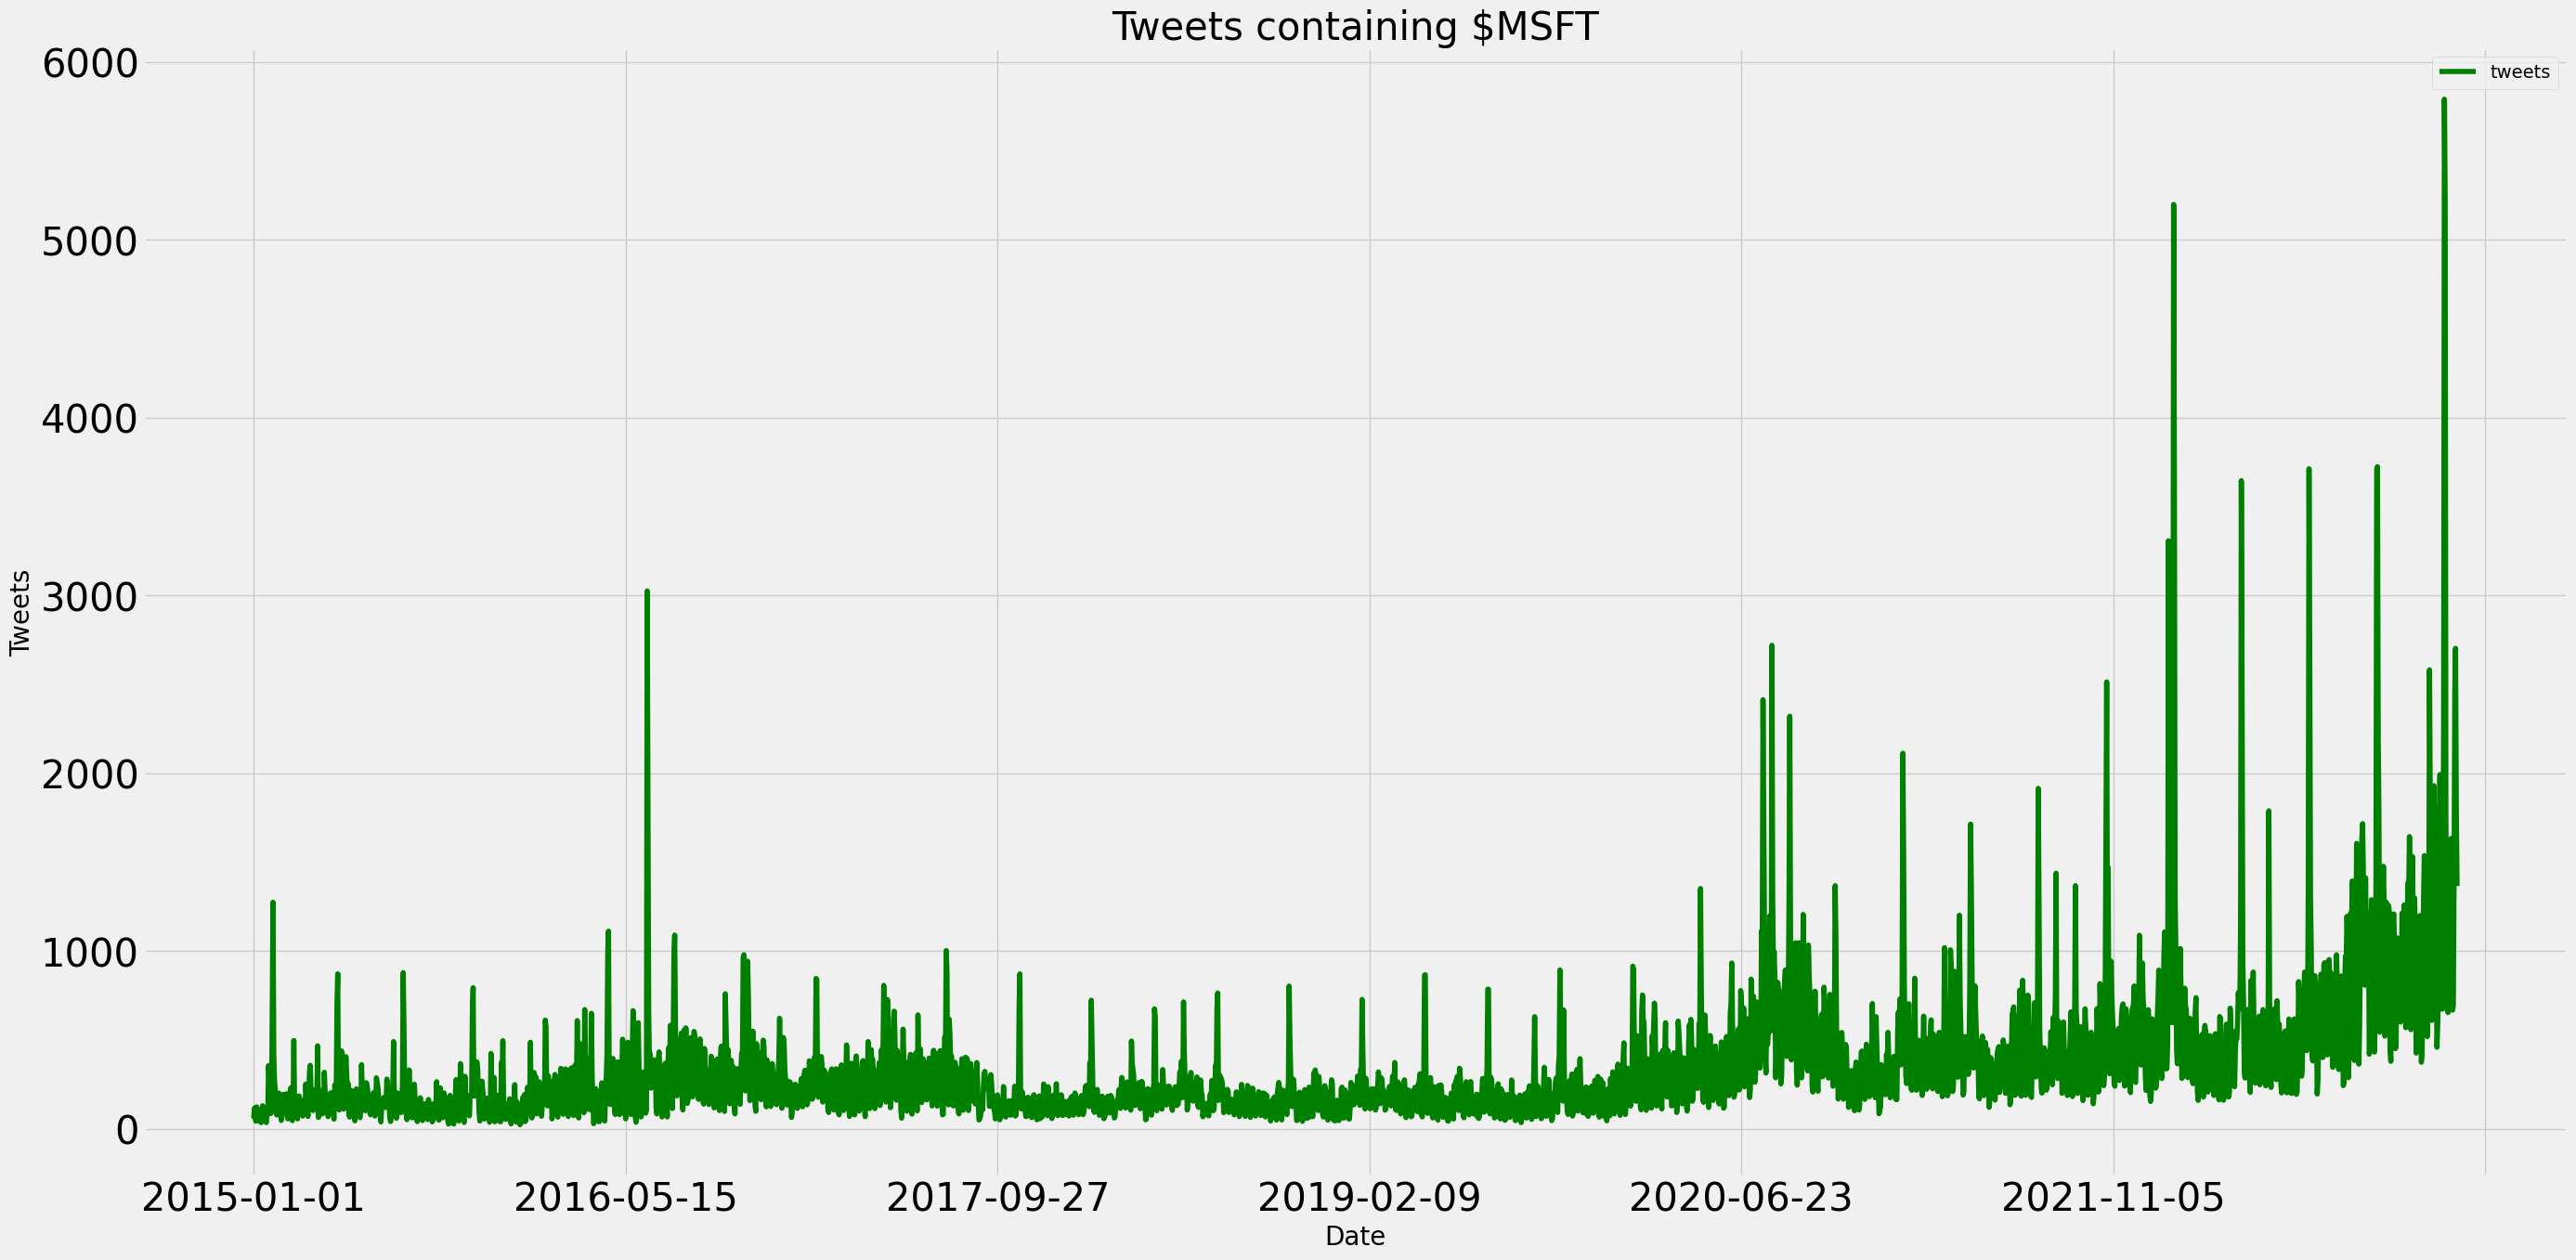

In [ ]:
dft = pd.read_csv('drive/MyDrive/msft_twitter/msft_twitter_final.csv')
#Visualize
plt.figure(figsize=(30,15))
ax = plt.gca()
plt.title('Tweets containing $MSFT', fontsize=30)
dft.plot(kind = 'line', x = 'date', y = 'tweets', color = 'green', ax = ax)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Tweets', fontsize=20)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
plt.show()

In [ ]:
data1 = pd.read_csv('drive/MyDrive/msft_google_data.csv')
data2 = pd.read_csv('drive/MyDrive/msft_twitter/msft_twitter_final.csv')

output = pd.merge(data1, data2, on='date', how='right')

output.drop('Unnamed: 0', inplace=True, axis=1)
output.drop('Unnamed: 0.1', inplace=True, axis=1)
output

,date,MSFT,tweets
0,2015-01-01,1.05,58
1,2015-01-02,1.80,117
2,2015-01-03,0.00,60
3,2015-01-04,0.30,43
4,2015-01-05,2.40,123
...,...,...,...
2958,2023-02-06,21.56,1443
2959,2023-02-07,44.10,2461
2960,2023-02-08,49.00,2703
2961,2023-02-09,45.57,1801


In [ ]:
data3 = pd.read_csv('drive/MyDrive/msft_stock_data.csv')
data3.rename(columns={'Date':'date'}, inplace=True)
finaldata = pd.merge(data3, output, on='date', how='left')
finaldata.to_csv('drive/MyDrive/msft_final_data.csv')

In [ ]:
dataset = pd.read_csv('drive/MyDrive/msft_final_data.csv')
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2042 non-null   int64  
 1   date        2042 non-null   object 
 2   Open        2042 non-null   float64
 3   High        2042 non-null   float64
 4   Low         2042 non-null   float64
 5   Close       2042 non-null   float64
 6   Adj Close   2042 non-null   float64
 7   Volume      2042 non-null   int64  
 8   MSFT        2042 non-null   float64
 9   tweets      2042 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 159.7+ KB
None


### Selecting Attributes to be Used

In [ ]:
df_all = pd.read_csv('drive/MyDrive/msft_final_data.csv', sep = ',', usecols = [1,5,8,9])
df_all.rename(columns={'date':'ds', 'Close':'y'}, inplace=True)
print(df_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2042 non-null   object 
 1   y       2042 non-null   float64
 2   MSFT    2042 non-null   float64
 3   tweets  2042 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 63.9+ KB
None


In [ ]:
norm_df = df_all[df_all.columns[1:]]
min_value = norm_df.min()
max_value = norm_df.max()
norm_df = (norm_df - min_value)/(max_value - min_value)
norm_df['ds'] = pd.to_datetime(df_all['ds'])
norm_df['ds'] = norm_df['ds'].dt.strftime('%d/%m/%Y')
norm_df = norm_df[norm_df.columns[::-1]]
norm_df

,ds,tweets,MSFT,y,Open
0,02/01/2015,0.010979,0.000407,0.021366,0.020770
1,05/01/2015,0.012025,0.006515,0.019946,0.019817
2,06/01/2015,0.004880,0.001934,0.017700,0.019850
3,07/01/2015,0.007320,0.006515,0.019616,0.018536
4,08/01/2015,0.009237,0.009568,0.024107,0.021066
...,...,...,...,...,...
2037,06/02/2023,0.242070,0.201547,0.714880,0.713488
2038,07/02/2023,0.419484,0.430985,0.750512,0.723643
2039,08/02/2023,0.461659,0.480863,0.747771,0.765282
2040,09/02/2023,0.304461,0.445949,0.737501,0.767254


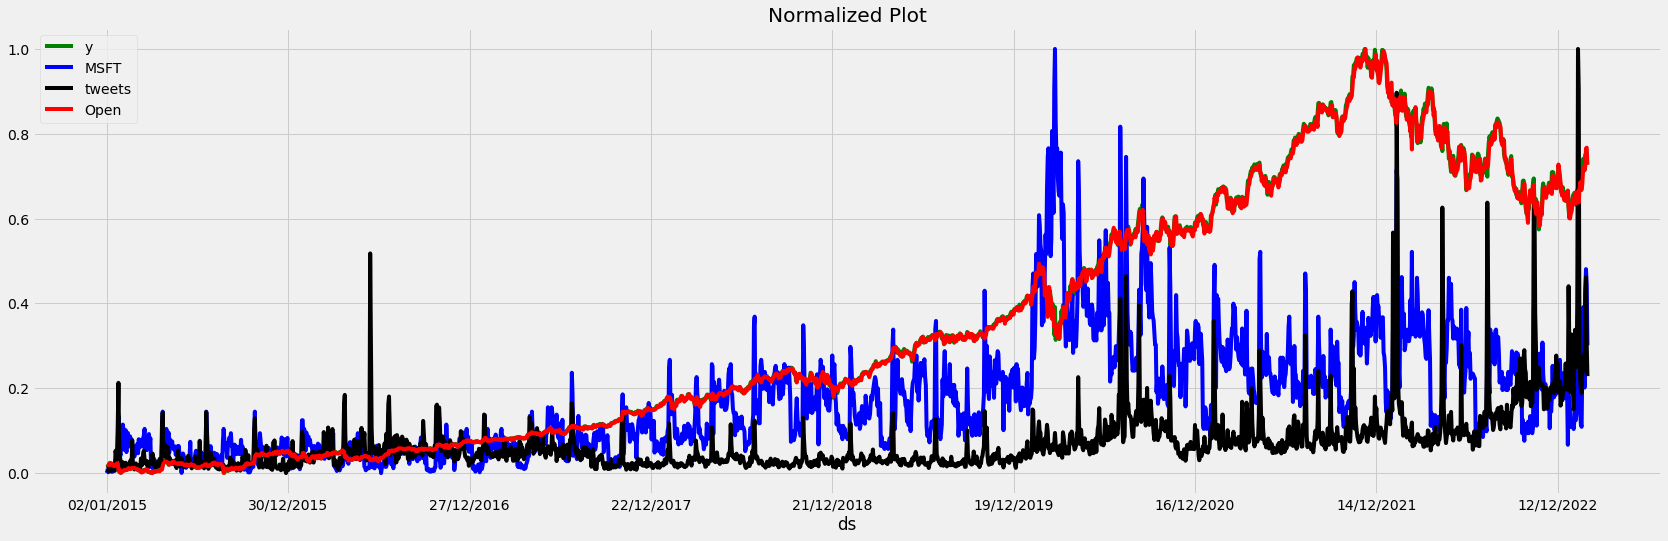

In [ ]:
plt.figure(figsize=(26,8))
ax = plt.gca()

norm_df.plot(kind = 'line', x = 'ds', y = 'y', color = 'green', ax = ax)
norm_df.plot(kind = 'line', x = 'ds', y = 'MSFT', color = 'blue', ax = ax)
norm_df.plot(kind = 'line', x = 'ds', y = 'tweets', color = 'black', ax = ax)
norm_df.plot(kind = 'line', x = 'ds', y = 'Open', color = 'red', ax = ax)

plt.title('Normalized Plot')
plt.show()

### Checking Correlation of Attributes towards "Close Price"

<ipython-input-4-71a7a683fd9e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df_all.corr()


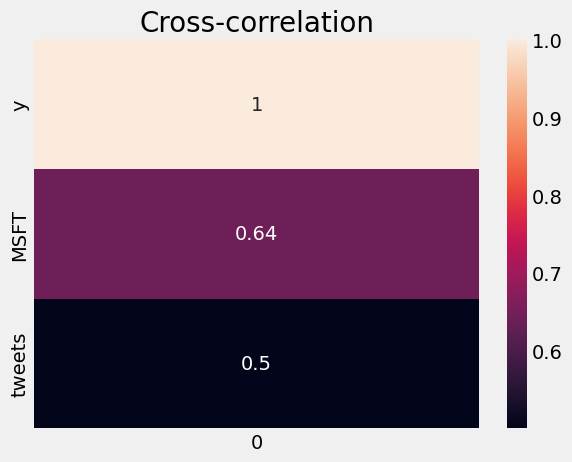

In [ ]:
import seaborn as sns
plt.figure()
c = df_all.corr()
ax = plt.axes()
ax.set_title("Cross-correlation", fontsize = 20)
sns.heatmap(c['y'].values.reshape(-1,1), yticklabels = c.columns, ax = ax, annot = True)
plt.show()

## Data Processing

### Linear Regression

#### Data Splitting

In [ ]:
x = df_all[['tweets','MSFT','Open']]
y = df_all['y']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3 , shuffle=False,random_state = 0)

In [ ]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(1429, 3)
(613, 3)
(1429,)
(613,)


#### Train and Test

In [ ]:
regression = LinearRegression()
regression.fit(train_x, train_y)

LinearRegression()

In [ ]:
y_pred = regression.predict(test_x)
print(test_x.head())

      tweets  MSFT        Open
1429    1047  70.0  215.100006
1430     893  60.9  206.500000
1431    1047  54.6  207.600006
1432     697  45.5  213.399994
1433     762  44.1  207.199997


In [ ]:
dfr = pd.DataFrame({'Actual_Price': test_y, 'Predicted_Price': y_pred})
dfr.head(10)

,Actual_Price,Predicted_Price
1429,214.250000,215.563001
1430,202.660004,206.853018
1431,211.289993,207.963268
1432,205.369995,213.542490
1433,204.029999,207.371895
1434,205.410004,204.705747
1435,208.779999,208.573670
1436,205.050003,210.758496
1437,202.910004,200.168508
1438,200.389999,202.978577


In [ ]:
dfr.describe()

,Actual_Price,Predicted_Price
count,613.000000,613.000000
mean,263.204975,263.078667
std,35.742483,35.729020
min,200.389999,197.540390
25%,236.940002,236.180722
50%,258.089996,257.673729
75%,289.980011,289.654939
max,343.109985,344.371959


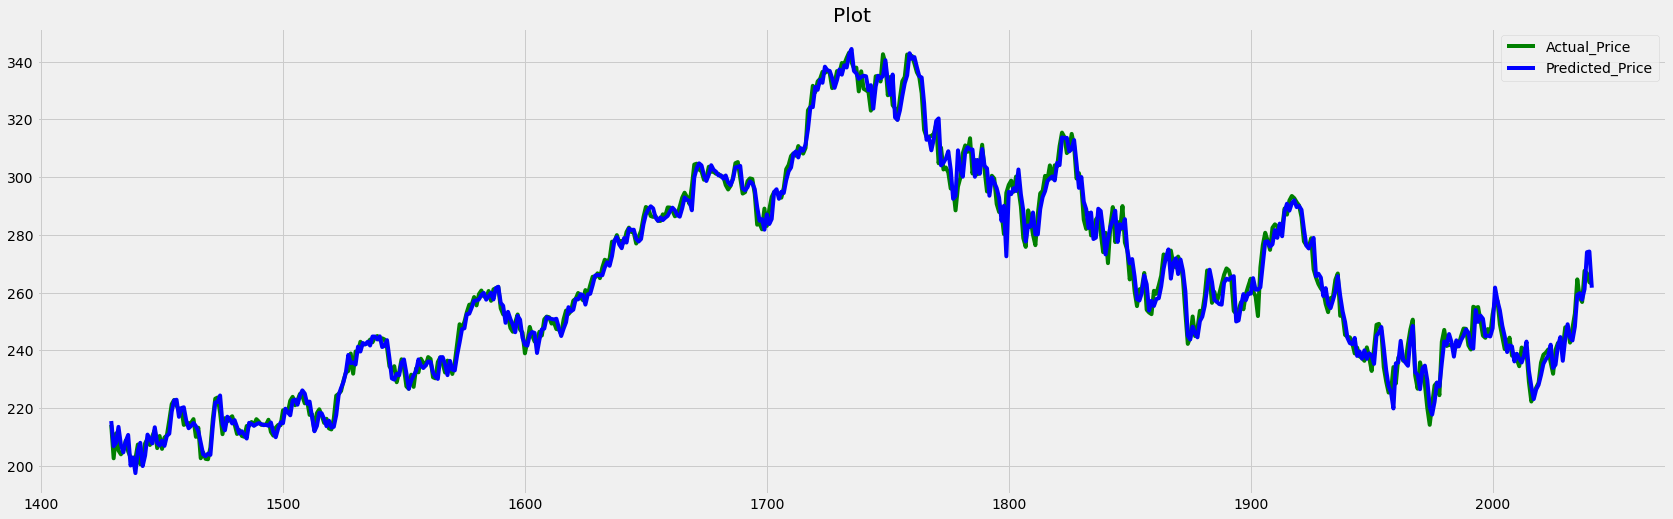

In [ ]:
plt.figure(figsize=(26,8))
ax = plt.gca()

dfr.plot(kind = 'line', y = 'Actual_Price', color = 'green', ax = ax)
dfr.plot(kind = 'line', y = 'Predicted_Price', color = 'blue', ax = ax)

plt.title('Plot')
plt.show()

#### Model Accuracy

In [ ]:
score = r2_score(dfr['Actual_Price'],dfr['Predicted_Price'])
mae = mean_absolute_error(dfr['Actual_Price'],dfr['Predicted_Price'])
print(score)
print(mae)

0.9877939445168041
3.002234880106749


In [ ]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = y2/x2*100
Accuracy1

99.95201150535493

#### Linear Regression 0.15 Test

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

In [ ]:
regression = LinearRegression()
regression.fit(train_x, train_y)

LinearRegression()

In [ ]:
y_pred = regression.predict(test_x)
dfr = pd.DataFrame({'Actual_Price': test_y, 'Predicted_Price': y_pred})
dfr.head(10)

,Actual_Price,Predicted_Price
1735,339.829987,344.917832
1736,337.679993,337.282582
1737,337.910004,336.477544
1738,329.679993,334.516758
1739,336.630005,335.151394
1740,330.589996,335.600820
1741,330.079987,335.423238
1742,329.489990,330.619522
1743,323.010010,332.372099
1744,326.190002,324.163943


In [ ]:
dfr.describe()

,Actual_Price,Predicted_Price
count,307.000000,307.000000
mean,272.545212,273.248070
std,31.363019,31.490047
min,214.250000,218.288014
25%,245.400002,245.690855
50%,266.649994,266.214925
75%,295.570007,295.342444
max,342.540009,344.917832


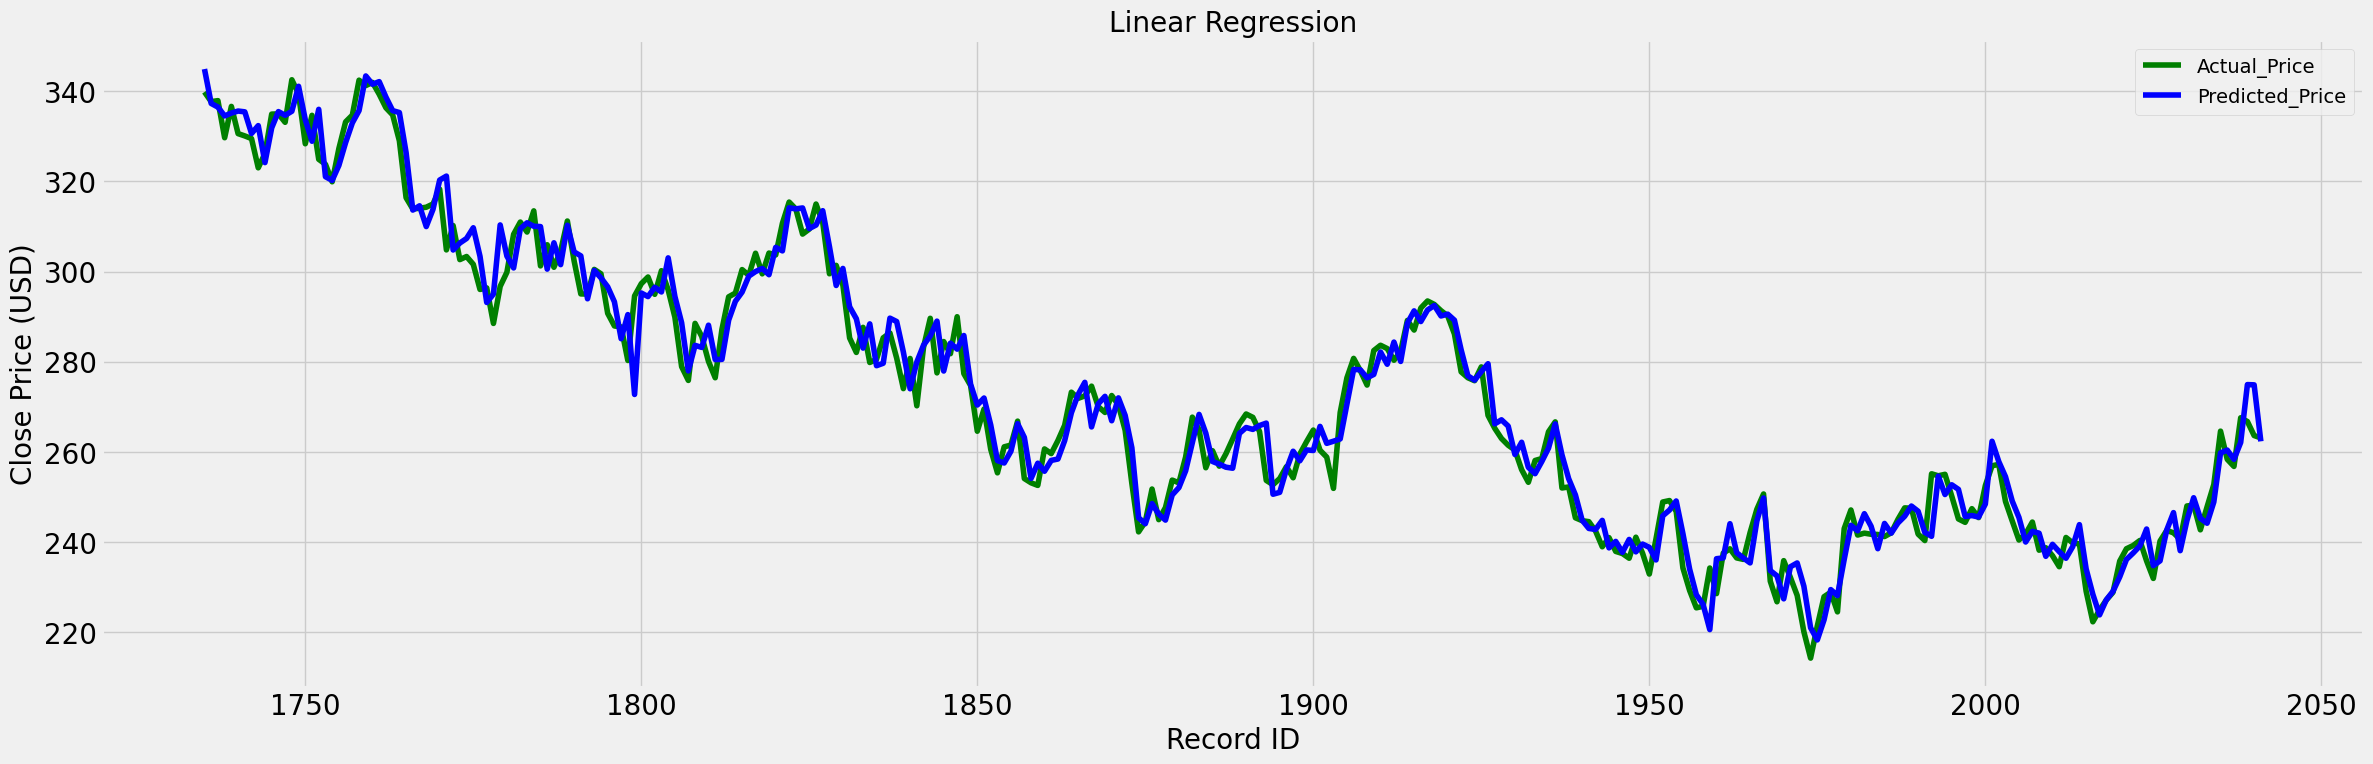

In [ ]:
plt.figure(figsize=(26,8))
ax = plt.gca()

dfr.plot(kind = 'line', y = 'Actual_Price', color = 'green', ax = ax)
dfr.plot(kind = 'line', y = 'Predicted_Price', color = 'blue', ax = ax)

plt.xlabel('Record ID', fontsize=20)
plt.ylabel('Close Price (USD)', fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.title('Linear Regression')
plt.show()

In [ ]:
score = r2_score(dfr['Actual_Price'],dfr['Predicted_Price'])
mae = mean_absolute_error(dfr['Actual_Price'],dfr['Predicted_Price'])
mse = mean_squared_error(dfr['Actual_Price'],dfr['Predicted_Price'])
rmse = np.sqrt(mse)
print('R2 score: ', score)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)

R2 score:  0.9750396854621981
Mean Absolute Error:  3.8677549294077256
Mean Squared Error:  24.47196446708928
Root Mean Squared Error:  4.946914641176789


In [ ]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
Accuracy1

99.74277631482306

### Random Forest

#### Data Splitting

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

#### Train and Test

In [ ]:
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(train_x,train_y)

RandomForestRegressor(n_estimators=1000)

In [ ]:
y_pred = rf.predict(test_x)

In [ ]:
dfr = pd.DataFrame({'Actual_Price': test_y, 'Predicted_Price': y_pred})
dfr.head(10)

,Actual_Price,Predicted_Price
1735,339.829987,340.779071
1736,337.679993,336.368189
1737,337.910004,336.179282
1738,329.679993,333.869367
1739,336.630005,335.473379
1740,330.589996,338.094062
1741,330.079987,337.726191
1742,329.489990,332.562317
1743,323.010010,332.891890
1744,326.190002,331.552969


In [ ]:
dfr.describe()

,Actual_Price,Predicted_Price
count,307.000000,307.000000
mean,272.545212,273.459321
std,31.363019,31.745163
min,214.250000,220.558769
25%,245.400002,246.286988
50%,266.649994,267.458539
75%,295.570007,294.151299
max,342.540009,340.812431


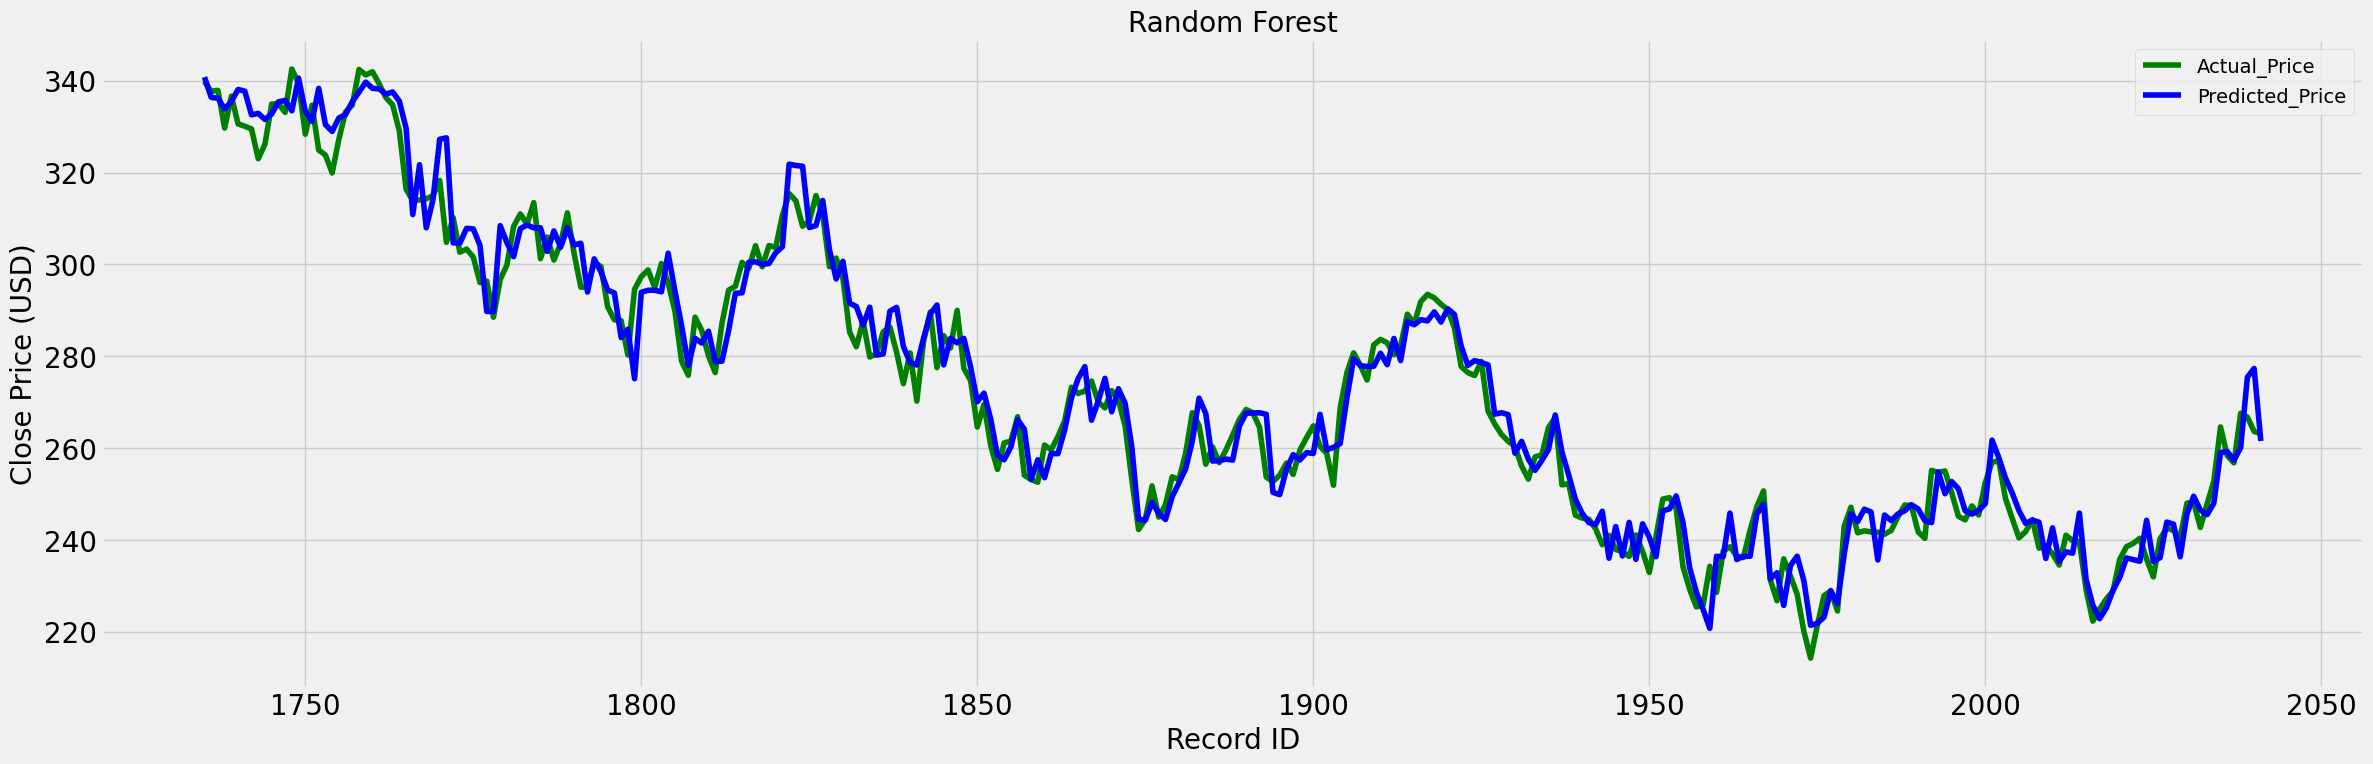

In [ ]:
plt.figure(figsize=(26,8))
ax = plt.gca()

dfr.plot(kind = 'line', y = 'Actual_Price', color = 'green', ax = ax)
dfr.plot(kind = 'line', y = 'Predicted_Price', color = 'blue', ax = ax)

plt.xlabel('Record ID', fontsize=20)
plt.ylabel('Close Price (USD)', fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.title('Random Forest')
plt.show()

#### Model Accuracy

In [ ]:
score = r2_score(dfr['Actual_Price'],dfr['Predicted_Price'])
mae = mean_absolute_error(dfr['Actual_Price'],dfr['Predicted_Price'])
mse = mean_squared_error(dfr['Actual_Price'],dfr['Predicted_Price'])
rmse = np.sqrt(mse)
print('R2 score: ', score)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)

R2 score:  0.9706137485288109
Mean Absolute Error:  4.2309834953581476
Mean Squared Error:  28.811307675420874
Root Mean Squared Error:  5.367616573063027


In [ ]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
Accuracy1

99.66324371571137

### Decision Tree Regressor

#### Data Splitting

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

#### Train and Test

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(train_x, train_y)

DecisionTreeRegressor()

In [ ]:
y_pred = dtr.predict(test_x)

In [ ]:
dfr = pd.DataFrame({'Actual_Price': test_y, 'Predicted_Price': y_pred})
dfr.head(10)

,Actual_Price,Predicted_Price
1735,339.829987,339.119995
1736,337.679993,336.989990
1737,337.910004,335.950012
1738,329.679993,330.799988
1739,336.630005,330.799988
1740,330.589996,330.799988
1741,330.079987,330.799988
1742,329.489990,332.429993
1743,323.010010,333.130005
1744,326.190002,324.350006


In [ ]:
dfr.describe()

,Actual_Price,Predicted_Price
count,307.000000,307.000000
mean,272.545212,273.254201
std,31.363019,32.208776
min,214.250000,217.690002
25%,245.400002,245.445000
50%,266.649994,268.720001
75%,295.570007,294.850006
max,342.540009,343.109985


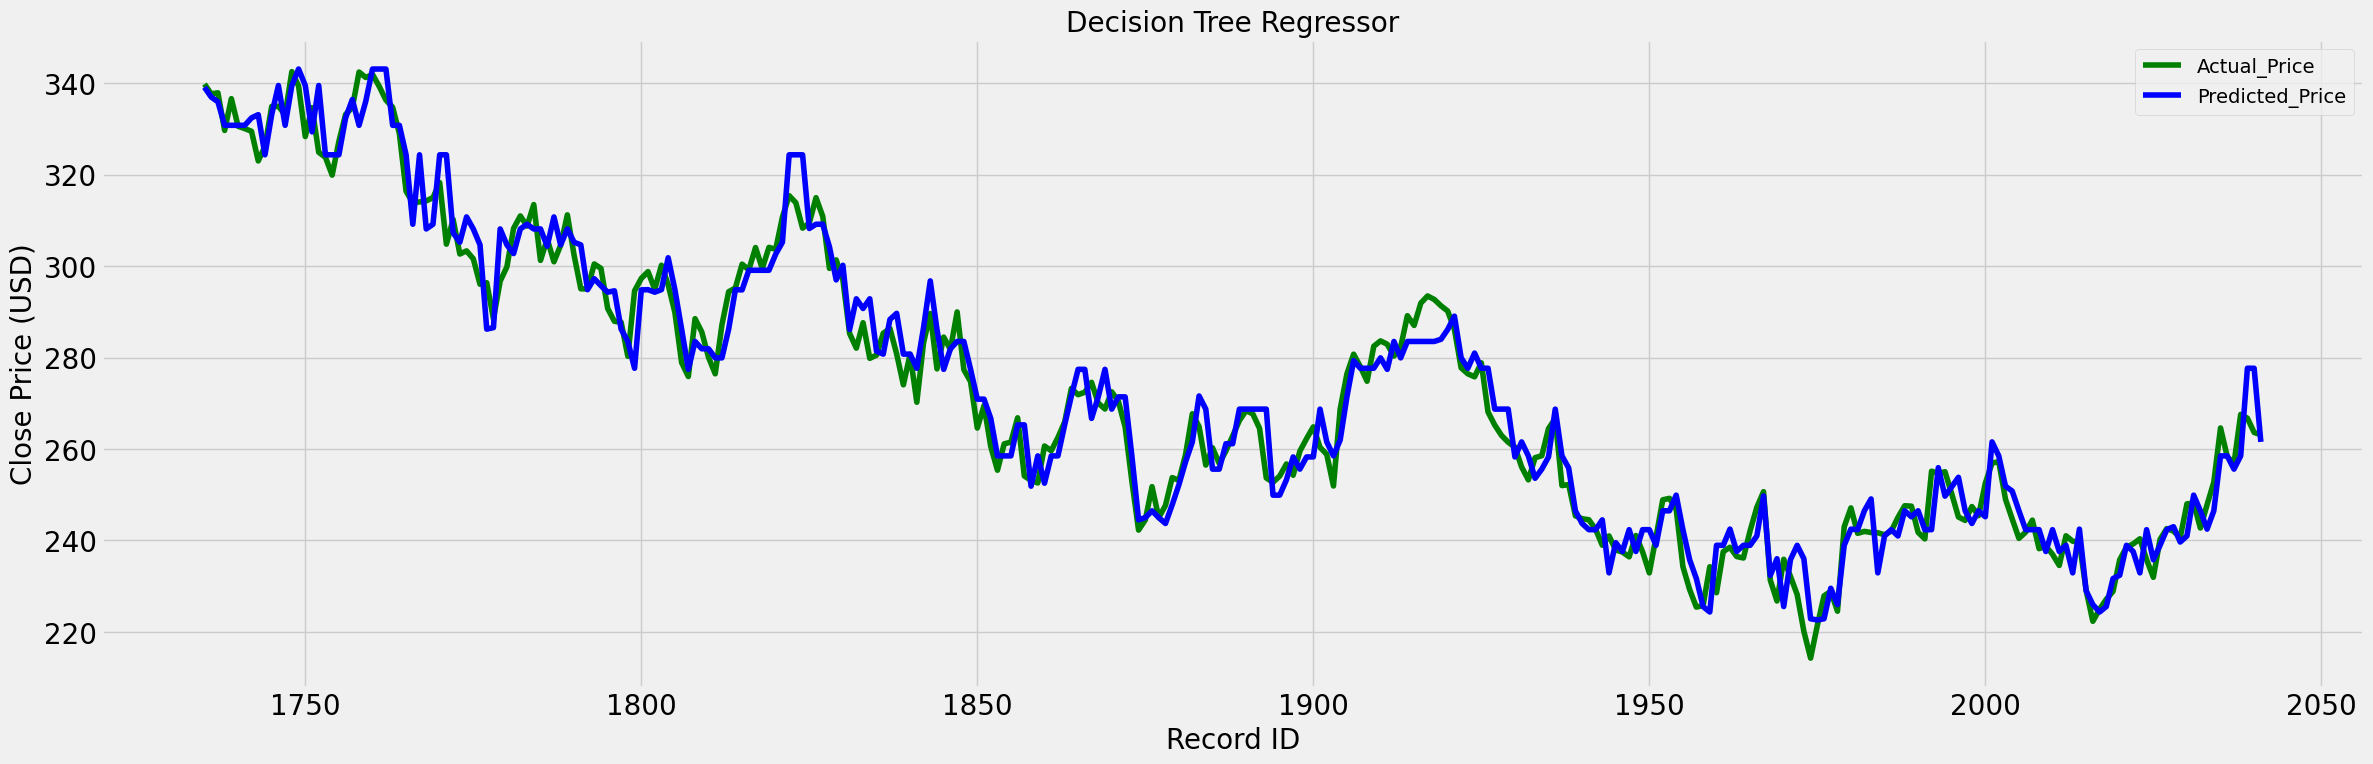

In [ ]:
plt.figure(figsize=(26,8))
ax = plt.gca()

dfr.plot(kind = 'line', y = 'Actual_Price', color = 'green', ax = ax)
dfr.plot(kind = 'line', y = 'Predicted_Price', color = 'blue', ax = ax)

plt.xlabel('Record ID', fontsize=20)
plt.ylabel('Close Price (USD)', fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.title('Decision Tree Regressor')
plt.show()

#### Model Accuracy

In [ ]:
score = r2_score(dfr['Actual_Price'],dfr['Predicted_Price'])
mae = mean_absolute_error(dfr['Actual_Price'],dfr['Predicted_Price'])
mse = mean_squared_error(dfr['Actual_Price'],dfr['Predicted_Price'])
rmse = np.sqrt(mse)
print('R2 score: ', score)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)

R2 score:  0.9611843210635721
Mean Absolute Error:  4.745147456563645
Mean Squared Error:  38.05624781929774
Root Mean Squared Error:  6.168974616522403


In [ ]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
Accuracy1

99.59801970025875